In [1]:
# Author: SAI BHARATH BAJOJI
# Import Libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import category_encoders as ce
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [2]:
def model_fitting (datapath, target):
    data = pd.read_csv(datapath)
    # Separating categorical and numerical datatypes
    cat_data = data.select_dtypes(include=['object','category'])
    num_data = data.select_dtypes(include=['int64','float64'])
    # Filling missing values
    num_data = num_data.fillna(num_data.mean())
    cat_data = cat_data.fillna(cat_data.mode().iloc[0])
    
    if cat_data.empty == True :
        final_data = num_data
    else :
        # Label Encoding categorical data
        cat_label_encoded = cat_data.apply(LabelEncoder().fit_transform)
        # Joining both data sets
        final_data = pd.concat([num_data.reset_index(drop=True),cat_label_encoded.reset_index(drop=True)], axis=1)
    
    # Defining the target/dependent variable
    y = final_data[[target]]
    y = y.values.ravel()
    # Defining independent variables
    x = final_data.drop([target], axis=1)
    # Splitting final data set into training set and test set
    X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1)
    
    # Model Fitting
    # 1 - Logistic Regression
    lr = LogisticRegression(solver='lbfgs', max_iter=10000, random_state=1)
    lr.fit(X_train,y_train)
    lr_pred = lr.predict(X_test)
    lr_pred = pd.DataFrame(lr_pred)
    lr_cnf = metrics.confusion_matrix(y_test,lr_pred)
    
    lr_accuracy = metrics.accuracy_score(y_test,lr_pred)
    lr_precision = metrics.precision_score(y_test,lr_pred)
    lr_recall = metrics.recall_score(y_test,lr_pred)
    lr_f1score = metrics.f1_score(y_test,lr_pred)
    lr_sensitivity = lr_cnf[0,0]/(lr_cnf[0,0]+lr_cnf[0,1])
    lr_specificity = lr_cnf[1,1]/(lr_cnf[1,0]+lr_cnf[1,1])
    
    # 2 - Random Forest Classifier
    rf = RandomForestClassifier(n_estimators=100, random_state=1)
    rf.fit(X_train,y_train)
    rf_pred = rf.predict(X_test)
    rf_pred = pd.DataFrame(rf_pred)
    rf_cnf = metrics.confusion_matrix(y_test,rf_pred)
    
    rf_accuracy = metrics.accuracy_score(y_test,rf_pred)
    rf_precision = metrics.precision_score(y_test,rf_pred)
    rf_recall = metrics.recall_score(y_test,rf_pred)
    rf_f1score = metrics.f1_score(y_test,rf_pred)
    rf_sensitivity = rf_cnf[0,0]/(rf_cnf[0,0]+rf_cnf[0,1])
    rf_specificity = rf_cnf[1,1]/(rf_cnf[1,0]+rf_cnf[1,1])
    
    # 3 - Naive Bayes Classifier
    gnb = GaussianNB()
    gnb.fit(X_train,y_train)
    gnb_pred = gnb.predict(X_test)
    gnb_pred = pd.DataFrame(gnb_pred)
    gnb_cnf = metrics.confusion_matrix(y_test,gnb_pred)
    
    gnb_accuracy = metrics.accuracy_score(y_test,gnb_pred)
    gnb_precision = metrics.precision_score(y_test,gnb_pred)
    gnb_recall = metrics.recall_score(y_test,gnb_pred)
    gnb_f1score = metrics.f1_score(y_test,gnb_pred)
    gnb_sensitivity = gnb_cnf[0,0]/(gnb_cnf[0,0]+gnb_cnf[0,1])
    gnb_specificity = gnb_cnf[1,1]/(gnb_cnf[1,0]+gnb_cnf[1,1])
    
    # 4 - KNN Classifier
    knn = KNeighborsClassifier(n_neighbors=5)
    knn.fit(X_train,y_train)
    knn_pred = knn.predict(X_test)
    knn_pred = pd.DataFrame(knn_pred)
    knn_cnf = metrics.confusion_matrix(y_test,knn_pred)
    
    knn_accuracy = metrics.accuracy_score(y_test,knn_pred)
    knn_precision = metrics.precision_score(y_test,knn_pred)
    knn_recall = metrics.recall_score(y_test,knn_pred)
    knn_f1score = metrics.f1_score(y_test,knn_pred)
    knn_sensitivity = knn_cnf[0,0]/(knn_cnf[0,0]+knn_cnf[0,1])
    knn_specificity = knn_cnf[1,1]/(knn_cnf[1,0]+knn_cnf[1,1])
    
    # Printing Metrics Data
    metrics_data = [
        ['LGR',lr_accuracy,lr_precision,lr_recall,lr_f1score,lr_sensitivity,lr_specificity],
        ['RFC',rf_accuracy,rf_precision,rf_recall,rf_f1score,rf_sensitivity,rf_specificity],
        ['GNB',gnb_accuracy,gnb_precision,gnb_recall,gnb_f1score,gnb_sensitivity,gnb_specificity],
        ['KNN',knn_accuracy,knn_precision,knn_recall,knn_f1score,knn_sensitivity,knn_specificity],
    ]
    
    model_metrics = pd.DataFrame(metrics_data, columns=['Model','Accuracy','Precision','Recall','F1 Score','Sensitivity','Specificity'])
    print(model_metrics)
    
    # Feature Importances
    rf.fit(x,y)
    feature_imp = pd.Series(rf.feature_importances_,index=x.columns).sort_values(ascending=False)
    
    # Plot of Feature Importances
    sns.barplot(x=feature_imp, y=feature_imp.index)
    plt.xlabel('Feature Importance Score')
    plt.ylabel('Features')
    plt.title('Visualizing Important Features')
    plt.show()

  Model  Accuracy  Precision    Recall  F1 Score  Sensitivity  Specificity
0   LGR  0.802242   0.636488  0.312038  0.418773     0.947274     0.312038
1   RFC  0.863197   0.725076  0.645595  0.683031     0.927577     0.645595
2   GNB  0.802088   0.641834  0.301278  0.410069     0.950259     0.301278
3   KNN  0.789344   0.570037  0.314728  0.405546     0.929765     0.314728


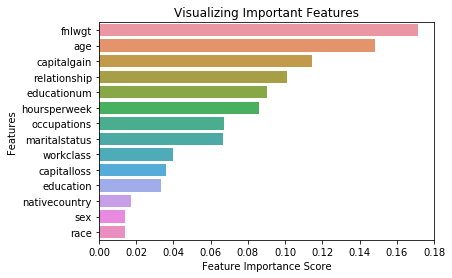

In [3]:
model_fitting(datapath="D:/Solverminds/Data_sets/Adult_data_Set.csv", target="income")

  Model  Accuracy  Precision    Recall  F1 Score  Sensitivity  Specificity
0   LGR  0.796610   0.708333  0.772727  0.739130     0.810811     0.772727
1   RFC  0.728814   0.650000  0.590909  0.619048     0.810811     0.590909
2   GNB  0.762712   0.653846  0.772727  0.708333     0.756757     0.772727
3   KNN  0.627119   0.500000  0.409091  0.450000     0.756757     0.409091


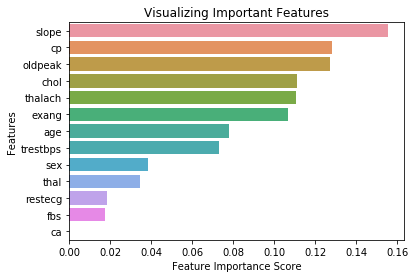

In [4]:
model_fitting(datapath="D:/Solverminds/Data_sets/Heart_disease_Prediction.csv", target="heart_disease")

  Model  Accuracy  Precision    Recall  F1 Score  Sensitivity  Specificity
0   LGR  0.779221   0.756098  0.563636  0.645833     0.898990     0.563636
1   RFC  0.805195   0.765957  0.654545  0.705882     0.888889     0.654545
2   GNB  0.772727   0.708333  0.618182  0.660194     0.858586     0.618182
3   KNN  0.733766   0.645833  0.563636  0.601942     0.828283     0.563636


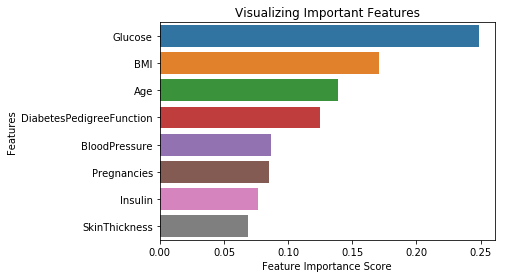

In [5]:
model_fitting(datapath="D:/Solverminds/Data_sets/Diabetes.csv", target="Outcome")

  Model  Accuracy  Precision    Recall  F1 Score  Sensitivity  Specificity
0   LGR  0.910537   0.673010  0.415155  0.513531     0.974113     0.415155
1   RFC  0.917092   0.681429  0.509072  0.582773     0.969456     0.509072
2   GNB  0.852391   0.400994  0.602988  0.481671     0.884399     0.602988
3   KNN  0.907138   0.614667  0.491996  0.546532     0.960416     0.491996


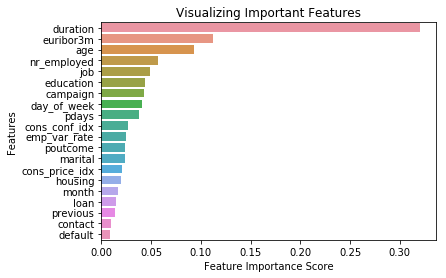

In [6]:
model_fitting(datapath="D:/Solverminds/Data_sets/Banking.csv", target="y")